This notebook loads the _Mountains_ dataset and _Countries_ dataset, uses Pandas to join them together to determine the continent of each mountain. Then groups the merged set by continent and uses _Matplotlib_ to show statistics over the mountains dataset within each continent.

In [1]:
from Mountains_2 import load_mountains3
import matplotlib.pyplot as plt
import pandas

Load the two datasets in two Pandas DataFrames:
_mountains_dataFrame_ is loaded from "mountains_db.tsv" into a DataFrame with the columns: ["name", "elevation", "country", "country_iso"]
_countries_dataFrame_ is loaded from "countries_db.tsv" into a DataFrame with the columns: ["country_iso", "continent"]
Then, eliminate from the mountains_dataFrame the rows having a "None" elevation.

In [16]:
mountains_set, countries_set = load_mountains3("mountains_db.tsv", "countries_db.tsv")
mountains_dataFrame = pandas.DataFrame(mountains_set)
countries_dataFrame = pandas.DataFrame(countries_set)
mountains_dataFrame = mountains_dataFrame[mountains_dataFrame["elevation"].notnull()]

Eliminate from the mountains_dataFrame the rows not having an elevation, then merge (join) the two DataFrames by their "country_iso" column. Finally group the merged set by the "Continent" column.

In [41]:
merged_dataFrame = mountains_dataFrame.merge(countries_dataFrame, on="country_iso")
iso_groups = merged_dataFrame.groupby("continent")
iso_stats = iso_groups["elevation"].agg(["min", "max", "median", "mean", "std"])
iso_series = iso_groups["elevation"].apply(list)

Finally create a graph, showing the min, max and median plots, overlaid on top of the elevation quartile boxes (whiskers) for each continent.

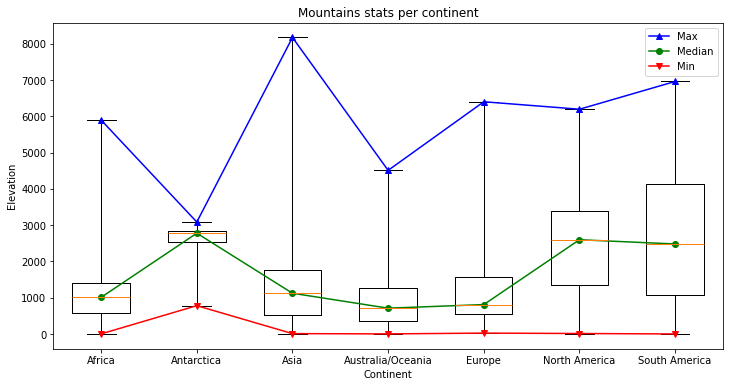

In [44]:
plt.figure(figsize=(12, 6))
plt.title("Mountains stats per continent")
plt.xlabel("Continent")
plt.ylabel("Elevation")
# establish the positions on the x-axis and set it with the ticks and labels 
positions = range(len(iso_series))
plt.boxplot(iso_series.tolist(), positions=positions, widths=0.6, whis=[0, 100])
# xticks need to follow boxplot otherwise boxplot resets the positions to the default 0,1,2...
plt.xticks(ticks=positions, labels=iso_stats.index.tolist())
plt.plot(iso_stats.index.tolist(), iso_stats["max"], label="Max", color="blue", marker="^")
plt.plot(iso_stats.index.tolist(), iso_stats["median"], label="Median", color="green", marker="o")
plt.plot(iso_stats.index.tolist(), iso_stats["min"], label="Min", color="red", marker="v")
plt.legend()
plt.show()